In [1]:
import numpy as np
import pandas as pd
from collections import Counter, defaultdict

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from scipy.sparse import csr_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/josephttustin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick
doi=df_quick["Review"].values
df_quick


Freshness                                             Review
0             1   Manakamana doesn't answer any questions, yet ...
1             1   Wilfully offensive and powered by a chest-thu...
2             0   It would be difficult to imagine material mor...
3             0   Despite the gusto its star brings to the role...
4             0   If there was a good idea at the core of this ...
5             0   Gleeson goes the Hallmark Channel route, dama...
6             1   It was the height of satire in 1976: dark as ...
7             0   Everyone in "The Comedian" deserves a better ...
8             0   Actor encourages grumpy Christians to embrace...
9             1          Slight, contained, but ineffably soulful.
10            1   Bell's debut feature addresses its subject wi...
11            1   ... except for its shamelessly (and irresisti...
12            0   This is not one for the uninitiated. It's als...
13            1   Son of Saul employs the formal mechanics of f...
14            0   It isn't thrilling. Fox can't act. The backch...
15            0   Hiddleston and Swinton are lovely to watch, b...
16            1   Yossi is a stronger film than its predecessor...
17            1   I feel like a Sparkle Baby just puked rainbow...
18            0                              Long, unfocused film.
19            1   Kubo and the Two Strings is better than immer...
20            0   Easy to enjoy, if you're at all susceptible t...
21            1   An extraordinary blast from the past, X-Men: ...
22            1   Mostly lightweight, but the most interesting ...
23            1   Drawn, per a disclaimer, from period accounts...
24            1   ... hones its dramatic elements to emotional ...
25            0   What seemed like a decent idea - a fourth and...
26            0   Free Birds is unappealingly staged and paced ...
27            0   A joyless, misanthropic 105 minutes worth of ...
28            0   This one, directed by John Glen, just follows...
29            1   The movie is purely visceral, generating adre...
...         ...                                                ...
9970          0   There's nothing worthwhile about a single mom...
9971          0   The story stagnates with the null drawing of ...
9972          1   Writer/director Paul Thomas Anderson's period...
9973          0   The only reasons to see this structurally mes...
9974          0   I've never seen Kristen Bell more unlikable a...
9975          0   Mann seems undecided about what he wants Enem...
9976          0   Gigi is dressed to kill, but if all the Frenc...
9977          1   Tells a specifically Chinese story, and yet i...
9978          0   Man of Steel starts feeling like just another...
9979          0   The sex was good but the delirious lesbian mu...
9980          1   There is so much attention to detail, it's ge...
9981          1   While none of it's anything particularly spec...
9982          1   Hayek and Lithgow are outstanding in their le...
9983          0   [VIDEO ESSAY] Indolent pacing combines with t...
9984          0   The least fun of the three: overworked and un...
9985          1   Extremely original masterpiece in British cinema
9986          1   The pugnacious John C. is gifted and knows no...
9987          1   Saoirse Ronan plays this interior drama with ...
9988          1   Karolina Gruszka is very good as Curie, conve...
9989          1   An altogether astonishing film, not in the le...
9990          0   Scott's film can't quite decide whether it's ...
9991          1   More than just a not-so-instant replay...even...
9992          1   Screenwriter Rebecca Frayn's full feature deb...
9993          0   The cast adds little. Columbus Short, a dance...
9994          1   But the film's fascination lies less in its p...
9995          0   Can a video game turn a movie into a hit, man...
9996          0   If you swallow this type of thing no matter w...
9997          1   It all escalates into an arch, know

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(lowercase=True, tokenizer=None, stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=None)
count_vect.fit(df_quick.Review.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
count_vect.vocabulary_

{'manakamana': 10858,
 'doesn': 5244,
 'answer': 882,
 'questions': 14155,
 'makes': 10823,
 'point': 13428,
 'nepal': 11990,
 'like': 10420,
 'rest': 14877,
 'planet': 13320,
 'picturesque': 13203,
 'far': 6543,
 'peaceable': 12941,
 'kingdom': 9943,
 'wilfully': 19842,
 'offensive': 12334,
 'powered': 13607,
 'chest': 3012,
 'thumping': 18168,
 'machismo': 10763,
 'good': 7711,
 'clean': 3219,
 'fun': 7291,
 'difficult': 4924,
 'imagine': 8875,
 'material': 11030,
 'wrong': 20062,
 'spade': 16757,
 'lost': 10612,
 'despite': 4792,
 'gusto': 8035,
 'star': 17046,
 'brings': 2323,
 'role': 15186,
 'hard': 8185,
 'ride': 15046,
 'shotgun': 16121,
 'hector': 8333,
 'voyage': 19486,
 'discovery': 5043,
 'idea': 8798,
 'core': 3912,
 'film': 6744,
 'buried': 2473,
 'unsightly': 19085,
 'pile': 13227,
 'flatulence': 6882,
 'jokes': 9700,
 'dog': 5245,
 'related': 14636,
 'bad': 1423,
 'puns': 14069,
 'ridiculous': 15054,
 'serial': 15884,
 'arson': 1098,
 'plot': 13384,
 'gleeson': 7615,
 '

In [5]:
feature_names = count_vect.get_feature_names()
feature_names

['000',
 '007',
 '08',
 '10',
 '100',
 '101',
 '105',
 '106',
 '108',
 '11',
 '110',
 '113',
 '117',
 '118',
 '12',
 '120',
 '121',
 '123',
 '125',
 '127',
 '12a',
 '13',
 '130',
 '134',
 '135',
 '136',
 '13th',
 '14',
 '1408',
 '141',
 '15',
 '150',
 '16',
 '166',
 '16mm',
 '17',
 '17th',
 '18',
 '1927',
 '1930s',
 '1931',
 '1936',
 '1937',
 '1938',
 '1940',
 '1940s',
 '1942',
 '1946',
 '1948',
 '1950',
 '1950s',
 '1951',
 '1955',
 '1959',
 '196',
 '1960',
 '1960s',
 '1961',
 '1965',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1973',
 '1974',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '199',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1994',
 '1996',
 '1998',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2000s',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2010s',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019

In [6]:
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

000                  0
007                  1
08                   2
10                   3
100                  4
101                  5
105                  6
106                  7
108                  8
11                   9
110                  10
113                  11
117                  12
118                  13
12                   14
120                  15
121                  16
123                  17
125                  18
127                  19
12a                  20
13                   21
130                  22
134                  23
135                  24
136                  25
13th                 26
14                   27
1408                 28
141                  29
15                   30
150                  31
16                   32
166                  33
16mm                 34
17                   35
17th                 36
18                   37
1927                 38
1930s                39
1931                 40
1936                 41
19

buenas               2414
buff                 2415
buffalo              2416
buffers              2417
buffet               2418
buffeted             2419
buffoon              2420
buffoonery           2421
buffs                2422
bug                  2423
bugs                 2424
build                2425
building             2426
buildings            2427
builds               2428
buildup              2429
built                2430
bujalski             2431
bulges               2432
bulging              2433
buljiti              2434
bulk                 2435
bulky                2436
bull                 2437
bullet               2438
bullets              2439
bullfighting         2440
bullhead             2441
bullied              2442
bullies              2443
bullish              2444
bullock              2445
bullwinkle           2446
bullying             2447
bum                  2448
bumblebee            2449
bumbling             2450
bummer               2451
bumped      

corrupt              3941
corruption           3942
corset               3943
corsets              3944
coruscant            3945
cory                 3946
cosa                 3947
cosmatos             3948
cosmic               3949
cosmopolis           3950
cosmos               3951
cost                 3952
costa                3953
costarring           3954
costars              3955
costner              3956
costs                3957
costume              3958
costumes             3959
costuming            3960
coterie              3961
cotillard            3962
cotton               3963
cottrell             3964
couch                3965
cougar               3966
cough                3967
coughed              3968
couldn               3969
counseling           3970
counselor            3971
count                3972
countdown            3973
counted              3974
counter              3975
counteract           3976
counterintuitive     3977
counterpart          3978
counterpoint

enigmatic            5940
enigmatically        5941
enjoy                5942
enjoyable            5943
enjoyably            5944
enjoyed              5945
enjoying             5946
enjoyment            5947
enjoys               5948
enlighten            5949
enlightening         5950
enlightenment        5951
enlightens           5952
enlisted             5953
enliven              5954
enlivened            5955
enlivening           5956
ennoia               5957
ennui                5958
enormous             5959
enormously           5960
enraging             5961
enriched             5962
enriching            5963
enrolled             5964
enron                5965
ensemble             5966
enslaved             5967
enslavement          5968
ensnaring            5969
ensue                5970
ensues               5971
ensure               5972
ensured              5973
ensures              5974
entangled            5975
enter                5976
entered              5977
entering    

grotesqueness        7940
grotesquerie         7941
grotesques           7942
grotto               7943
grouchy              7944
ground               7945
groundbreaking       7946
grounded             7947
groundhog            7948
grounds              7949
groundwork           7950
group                7951
groups               7952
groupthink           7953
grousing             7954
grove                7955
groves               7956
grow                 7957
growing              7958
grown                7959
grownup              7960
grownups             7961
grows                7962
growth               7963
gru                  7964
grudge               7965
gruel                7966
grueling             7967
gruelling            7968
gruesome             7969
gruff                7970
gruffness            7971
grump                7972
grumpy               7973
grungy               7974
grunt                7975
gruntiest            7976
grupo                7977
gruszka     

kinds                9939
kinetic              9940
kinetically          9941
king                 9942
kingdom              9943
kings                9944
kingsley             9945
kingsman             9946
kinkier              9947
kinkiest             9948
kinkos               9949
kinky                9950
kinnear              9951
kipling              9952
kirk                 9953
kirke                9954
kirkley              9955
kirsten              9956
kiss                 9957
kissinger            9958
kit                  9959
kitamura             9960
kitchen              9961
kite                 9962
kitsch               9963
kitten               9964
kitty                9965
klasik               9966
klebb                9967
kleenex              9968
kleiman              9969
klein                9970
kline                9971
kloves               9972
klute                9973
knack                9974
kneads               9975
kneale               9976
knee        

nearly               11939
nears                11940
neat                 11941
neatly               11942
nebraska             11943
necessarily          11944
necessary            11945
necessity            11946
neck                 11947
necks                11948
necrophiliacs        11949
ned                  11950
need                 11951
needed               11952
neediness            11953
needle               11954
needless             11955
needlessly           11956
needn                11957
needs                11958
needy                11959
neeson               11960
nefarious            11961
negation             11962
negative             11963
negativity           11964
negga                11965
neglected            11966
neglectful           11967
neglectfully         11968
neglects             11969
negligent            11970
negligible           11971
negotiated           11972
negro                11973
neighbor             11974
neighborhood         11975
n

prospect             13938
prospecting          13939
prospects            13940
prosthesis           13941
prosthetic           13942
prosthetics          13943
prostitute           13944
prostitution         13945
prostration          13946
protagonist          13947
protagonista         13948
protagonistas        13949
protagonisti         13950
protagonists         13951
protect              13952
protecting           13953
protection           13954
protector            13955
protest              13956
protests             13957
protracted           13958
protruding           13959
proud                13960
proudly              13961
prove                13962
proved               13963
proven               13964
proverbial           13965
proves               13966
provide              13967
provided             13968
providence           13969
provides             13970
providing            13971
provincial           13972
proving              13973
provocar             13974
p

salvation            15438
salve                15439
sam                  15440
samberg              15441
sameness             15442
sample               15443
samsara              15444
samurai              15445
san                  15446
sanchez              15447
sanctimonious        15448
sanctity             15449
sand                 15450
sandal               15451
sandbox              15452
sanded               15453
sanders              15454
sandi                15455
sandler              15456
sandra               15457
sandstorm            15458
sandwich             15459
sandwiched           15460
sandy                15461
sane                 15462
sang                 15463
sanity               15464
sant                 15465
santa                15466
santini              15467
santoro              15468
saoirse              15469
sap                  15470
sapphires            15471
sappifying           15472
sappily              15473
sappiness            15474
s

suburban             17437
suburbanites         17438
suburbia             17439
suburbicon           17440
suburbs              17441
suburra              17442
subversion           17443
subversive           17444
subversively         17445
subversiveness       17446
subverting           17447
subverts             17448
subwoofer            17449
succeed              17450
succeeded            17451
succeeding           17452
succeeds             17453
success              17454
successful           17455
successfully         17456
succession           17457
successive           17458
successor            17459
succinct             17460
succumb              17461
succumbs             17462
suck                 17463
suckage              17464
sucked               17465
sucker               17466
suckers              17467
sucks                17468
sucrose              17469
sudden               17470
suddenly             17471
sudsy                17472
suffer               17473
s

trying               18636
tryon                18637
tsangari             18638
tsotsi               18639
tsui                 18640
tsunami              18641
tub                  18642
tubbs                18643
tube                 18644
tucci                18645
tucked               18646
tucker               18647
tug                  18648
tugging              18649
tugs                 18650
tulip                18651
tulips               18652
tully                18653
tumbbad              18654
tumble               18655
tumbledown           18656
tumbleweed           18657
tumbling             18658
tumnus               18659
tune                 18660
tuned                18661
tuneful              18662
tunefully            18663
tunes                18664
tunnard              18665
tunnel               18666
tunrs                18667
tupac                18668
turbo                18669
turbocharged         18670
turbulent            18671
turd                 18672
t

In [7]:
X_train_counts = count_vect.transform(df_quick["Review"].values)  ##bag of words
print("The type of X_train_counts is {0}.".format(type(X_train_counts)))
print("The X matrix has {0} rows (documents) and {1} columns (words).".format(
        X_train_counts.shape[0], X_train_counts.shape[1]))

a=X_train_counts.todense()
a[0]
b=np.array(a)
type(b)
b[0].argmax()
b[0][244]

The type of X_train_counts is <class 'scipy.sparse.csr.csr_matrix'>.
The X matrix has 10000 rows (documents) and 20237 columns (words).


0

In [8]:
new_df = pd.DataFrame(X_train_counts.toarray(),columns=feature_names)
new_df.head()

000  007  08  10  100  101  105  106  108  11   ...     ánimas  élans  \
0    0    0   0   0    0    0    0    0    0   0   ...          0      0   
1    0    0   0   0    0    0    0    0    0   0   ...          0      0   
2    0    0   0   0    0    0    0    0    0   0   ...          0      0   
3    0    0   0   0    0    0    0    0    0   0   ...          0      0   
4    0    0   0   0    0    0    0    0    0   0   ...          0      0   

   éparpiller  época  être  ólafsson  ótima  últimos  único  흆erlund  
0           0      0     0         0      0        0      0        0  
1           0      0     0         0      0        0      0        0  
2           0      0     0         0      0        0      0        0  
3           0      0     0         0      0        0      0        0  
4           0      0     0         0      0        0      0        0  

[5 rows x 20237 columns]

In [9]:
# print("Document of interest: {0}".format(doi))
# for i in X_train_counts:
#     nnz_doi = X_train_counts[i].getnnz(axis=1)
#     nwords_doi = X_train_counts[i].sum()
#  nnz_doi = X_train_counts.getnnz(axis=1)
#  nwords_doi = X_train_counts.sum()
#     print("There are {0} non-zero word counts in document {1}.".format(nnz_doi, i))
#     print("There are {0} words in document {1}.".format(nwords_doi, i))

In [10]:
# print("\nThese are the indices, words, and counts in doc. {0}:".
#        format(doi))
# for i in range(words_doi.count_nonzero()):
#     word_index = words_doi.indices[i]
#     word = count_vect.get_feature_names()[word_index]
#     count = words_doi.data[i]
#     print("{0:<6d}  {1:<12s}  {2}".format(word_index, word, count))

In [11]:
# from sklearn.feature_extraction.text import TfidfTransformer
# # just do term frequency at first, use_idf = False
# tf_transformer = TfidfTransformer(use_idf=False)
# tf_transformer.fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# words_doi_tf = X_train_tf[doi]
# print("\nThese are the indices, words, and term frequencies in doc. {0}:".
#        format(doi))
# tf_lst = []
# for i in range(words_doi_tf.count_nonzero()):
#     word_index = words_doi_tf.indices[i]
#     word = count_vect.get_feature_names()[word_index]
#     count = words_doi_tf.data[i]
#     tf_lst.append(count)
#     print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, count))

# mag = np.sqrt(np.sum([tf**2 for tf in tf_lst]))
# print("\nThe magnitude of the tf vector for this document is {0:0.3f}".format(mag))
# print("It used the L2 norm.")

In [12]:
# tfidf_transformer = TfidfTransformer(use_idf=True)
# tfidf_transformer.fit(X_train_counts)
# X_train_tfidf = tfidf_transformer.transform(X_train_counts)
# words_doi_tfidf = X_train_tfidf[doi] 
# print("\nThese are the indices, words, and tf-idf values in doc. {0}:".
#       format(doi)) 
# for i in range(words_doi_tfidf.count_nonzero()): 
#     word_index = words_doi_tfidf.indices[i] 
#     word = count_vect.get_feature_names()[word_index]
#     tfidf = words_doi_tfidf.data[i]
#     print("{0:<6d}  {1:<12s}  {2:0.3f}".format(word_index, word, tfidf))

In [13]:
# from sklearn.naive_bayes import MultinomialNB

# print('\nTraining a Naive Bayes model.')
# nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# nb_model.fit(X_train_tfidf, twenty_train.target);

In [14]:
# docs_new = ['God is love', 'OpenGL on the GPU is fast', 
#             'Two hands working can do more than a thousand clasped in prayer.']
# X_new_counts = count_vect.transform(docs_new)
# X_new_tfidf = tfidf_transformer.transform(X_new_counts)
# predictions = nb_model.predict(X_new_tfidf)
# print('Predictions')
# for doc, category in zip(docs_new, predictions):
#     print("{0} => {1}".format(doc, twenty_train.target_names[category]))

In [15]:
# from sklearn.pipeline import Pipeline
# nb_pipeline = Pipeline([('vect', CountVectorizer()),
#                         ('tfidf', TfidfTransformer()),
#                         ('model', MultinomialNB()),
#                         ])
# nb_pipeline.fit(twenty_train.data, twenty_train.target); 

In [16]:
# twenty_test = fetch_20newsgroups(subset='test', categories=categories,
#                                      shuffle=True, random_state=42)
# docs_test = twenty_test.data
# predicted = nb_pipeline.predict(docs_test)
# accuracy = np.mean(predicted == twenty_test.target)
# print("\nThe accuracy on the test set is {0:0.3f}.".format(accuracy))

In [9]:
# 1. Create a set of documents.
documents = [' '.join(df_quick['Review']).lower() for row in df_quick]
print(documents)

[' manakamana doesn\'t answer any questions, yet makes its point: nepal, like the rest of our planet, is a picturesque but far from peaceable kingdom.  wilfully offensive and powered by a chest-thumping machismo, but it\'s good clean fun.  it would be difficult to imagine material more wrong for spade than lost & found.  despite the gusto its star brings to the role, it\'s hard to ride shotgun on hector\'s voyage of discovery.  if there was a good idea at the core of this film, it\'s been buried in an unsightly pile of flatulence jokes, dog-related bad puns and a ridiculous serial arson plot.  gleeson goes the hallmark channel route, damaging an intermittently curious entry in the time travel subgenre.  it was the height of satire in 1976: dark as hell, but patently absurd and surely nowhere close to objective reality. objective reality surpassed it somewhere in the jerry springer era.  everyone in "the comedian" deserves a better movie than "the comedian."  actor encourages grumpy chr

In [10]:
# 2. Create a set of tokenized documents.
docs = [word_tokenize(content) for content in documents]



In [11]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs = [[word for word in words if word not in stop] for words in docs]
docs

[['manakamana',
  "n't",
  'answer',
  'questions',
  ',',
  'yet',
  'makes',
  'point',
  ':',
  'nepal',
  ',',
  'like',
  'rest',
  'planet',
  ',',
  'picturesque',
  'far',
  'peaceable',
  'kingdom',
  '.',
  'wilfully',
  'offensive',
  'powered',
  'chest-thumping',
  'machismo',
  ',',
  "'s",
  'good',
  'clean',
  'fun',
  '.',
  'would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  '&',
  'found',
  '.',
  'despite',
  'gusto',
  'star',
  'brings',
  'role',
  ',',
  "'s",
  'hard',
  'ride',
  'shotgun',
  'hector',
  "'s",
  'voyage',
  'discovery',
  '.',
  'good',
  'idea',
  'core',
  'film',
  ',',
  "'s",
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'jokes',
  ',',
  'dog-related',
  'bad',
  'puns',
  'ridiculous',
  'serial',
  'arson',
  'plot',
  '.',
  'gleeson',
  'goes',
  'hallmark',
  'channel',
  'route',
  ',',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre',
  '.',
  

In [12]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs]


In [13]:
for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
    p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
    if len(set((p, s, w))) != 1:
        print("{}\t{}\t{}\t{}".format(docs[0][i], p, s, w))
p[::]
        


picturesque	picturesqu	picturesqu	picturesque
peaceable	peaceabl	peaceabl	peaceable
wilfully	wil	wil	wilfully
offensive	offens	offens	offensive
powered	power	power	powered
chest-thumping	chest-thump	chest-thump	chest-thumping
imagine	imagin	imagin	imagine
material	materi	materi	material
despite	despit	despit	despite
brings	bring	bring	brings
voyage	voyag	voyag	voyage
discovery	discoveri	discoveri	discovery
buried	buri	buri	buried
unsightly	unsightli	unsight	unsightly
flatulence	flatul	flatul	flatulence
dog-related	dog-rel	dog-rel	dog-related
ridiculous	ridicul	ridicul	ridiculous
goes	goe	goe	go
route	rout	rout	route
damaging	damag	damag	damaging
intermittently	intermitt	intermitt	intermittently
curious	curiou	curious	curious
entry	entri	entri	entry
subgenre	subgenr	subgenr	subgenre
satire	satir	satir	satire
patently	patent	patent	patently
surely	sure	sure	surely
nowhere	nowher	nowher	nowhere
objective	object	object	objective
reality	realiti	realiti	reality
objective	object	object	objec

able	abl	abl	able
transcends	transcend	transcend	transcends
generic	gener	generic	generic
restrictions	restrict	restrict	restriction
conspiracy	conspiraci	conspiraci	conspiracy
thinly	thinli	thin	thinly
veiled	veil	veil	veiled
conservatism	conservat	conservat	conservatism
undue	undu	undu	undue
disturbed	disturb	disturb	disturbed
implications	implic	implic	implication
fear-mongering	fear-mong	fear-mong	fear-mongering
recycled	recycl	recycl	recycled
jones	jone	jone	jones
predicaments	predica	predica	predicament
charging	charg	charg	charging
animals	anim	anim	animal
manages	manag	manag	manages
eventful	event	event	eventful
monotonous	monoton	monoton	monotonous
forty-five	forty-f	forty-f	forty-five
minutes	minut	minut	minute
already	alreadi	alreadi	already
glancing	glanc	glanc	glancing
wondering	wonder	wonder	wondering
lively	live	live	lively
playing	play	play	playing
figure	figur	figur	figure
based	base	base	based
entirely	entir	entir	entirely
audiences	audienc	audienc	audience
buying	buy

absurdly	absurdli	absurd	absurdly
convoluted	convolut	convolut	convoluted
blatantly	blatantli	blatant	blatantly
politically	polit	polit	politically
destination	destin	destin	destination
demonstrate	demonstr	demonstr	demonstrate
grotesque	grotesqu	grotesqu	grotesque
stomach-churning	stomach-churn	stomach-churn	stomach-churning
beauty	beauti	beauti	beauty
movies	movi	movi	movie
spectacle	spectacl	spectacl	spectacle
horrific	horrif	horrif	horrific
real-life	real-lif	real-lif	real-life
battles	battl	battl	battle
judging	judg	judg	judging
cheadle	cheadl	cheadl	cheadle
always	alway	alway	always
successful	success	success	successful
ambitious	ambiti	ambiti	ambitious
occasionally	occasion	occasion	occasionally
by-the-numbers	by-the-numb	by-the-numb	by-the-numbers
biography	biographi	biographi	biography
something	someth	someth	something
movie	movi	movi	movie
avoids	avoid	avoid	avoids
brings	bring	bring	brings
objective	object	object	objective
noche	noch	noch	noche
non-professionals	non-professi

meaning	mean	mean	meaning
really	realli	realli	really
thinking	think	think	thinking
single	singl	singl	single
dazzling	dazzl	dazzl	dazzling
impressive	impress	impress	impressive
technical	technic	technic	technical
achievements	achiev	achiev	achievement
dazzlingly	dazzlingli	dazzl	dazzlingly
confident	confid	confid	confident
spinning	spin	spin	spinning
slicing	slice	slice	slicing
directed	direct	direct	directed
story	stori	stori	story
finely	fine	fine	finely
detailed	detail	detail	detailed
suffering	suffer	suffer	suffering
miniature	miniatur	miniatur	miniature
insurmountable	insurmount	insurmount	insurmountable
sometimes	sometim	sometim	sometimes
certainly	certainli	certain	certainly
perhaps	perhap	perhap	perhaps
tackling	tackl	tackl	tackling
successfully	success	success	successfully
leave	leav	leav	leave
sense	sens	sens	sense
anticipation	anticip	anticip	anticipation
harry	harri	harri	harry
installment	instal	instal	installment
something	someth	someth	something
quite	quit	quit	quite
an

elegantly	elegantli	eleg	elegantly
cleaned	clean	clean	cleaned
color-corrected	color-correct	color-correct	color-corrected
shaped	shape	shape	shaped
satisfying	satisfi	satisfi	satisfying
narrative	narr	narrat	narrative
mostly	mostli	most	mostly
noise	nois	nois	noise
nonsense	nonsens	nonsens	nonsense
enterprise	enterpris	enterpris	enterprise
quite	quit	quit	quite
trivializes	trivial	trivial	trivializes
helping	help	help	helping
mitigate	mitig	mitig	mitigate
movie	movi	movi	movie
smart-alecky	smart-alecki	smart-alecki	smart-alecky
attitude	attitud	attitud	attitude
anything	anyth	anyth	anything
resembling	resembl	resembl	resembling
taste	tast	tast	taste
political	polit	polit	political
correctness	correct	correct	correctness
strictly	strictli	strict	strictly
prohibited	prohibit	prohibit	prohibited
movies	movi	movi	movie
living	live	live	living
awesome	awesom	awesom	awesome
missing	miss	miss	missing
characters	charact	charact	character
engaging	engag	engag	engaging
incomprehensible	incompre

everything	everyth	everyth	everything
encouraged	encourag	encourag	encouraged
ridicule	ridicul	ridicul	ridicule
falling	fall	fall	falling
unfortunately	unfortun	unfortun	unfortunately
making	make	make	making
bone-dry	bone-dri	bone-dri	bone-dry
gruffness	gruff	gruff	gruffness
crumbles	crumbl	crumbl	crumbles
replaced	replac	replac	replaced
adolescent	adolesc	adolesc	adolescent
jokiness	joki	joki	jokiness
pastoral	pastor	pastor	pastoral
imitation	imit	imit	imitation
busy	busi	busi	busy
trying	tri	tri	trying
provide	provid	provid	provide
forgets	forget	forget	forgets
important	import	import	important
despite	despit	despit	despite
spending	spend	spend	spending
screentime	screentim	screentim	screentime
audience	audienc	audienc	audience
invited	invit	invit	invited
george	georg	georg	george
company	compani	compani	company
failing	fail	fail	failing
decide	decid	decid	decide
story	stori	stori	story
telling	tell	tell	telling
vehicle	vehicl	vehicl	vehicle
canned	can	can	canned
comedic	comed	comed	

us	us	us	u
defeated	defeat	defeat	defeated
filmmaker	filmmak	filmmak	filmmaker
envy	envi	envi	envy
villeneuve	villeneuv	villeneuv	villeneuve
ability	abil	abil	ability
ugliness	ugli	ugli	ugliness
aesthetic	aesthet	aesthet	aesthetic
violence	violenc	violenc	violence
seems	seem	seem	seems
accepted	accept	accept	accepted
heavy-handed	heavy-hand	heavy-hand	heavy-handed
nature	natur	natur	nature
embraced	embrac	embrac	embraced
whole-heartedly	whole-heartedli	whole-heart	whole-heartedly
movie	movi	movi	movie
'em	'em	em	'em
used	use	use	used
justice	justic	justic	justice
league	leagu	leagu	league
considering	consid	consid	considering
would-be	would-b	would-b	would-be
blockbuster	blockbust	blockbust	blockbuster
features	featur	featur	feature
collection	collect	collect	collection
superheroes	superhero	superhero	superheroes
kryptonite	kryptonit	kryptonit	kryptonite
artistically	artist	artist	artistically
shackled	shackl	shackl	shackled
unsatisfying	unsatisfi	unsatisfi	unsatisfying
adaptation	adap

looking	look	look	looking
looking	look	look	looking
towards	toward	toward	towards
confronts	confront	confront	confronts
uncomfortable	uncomfort	uncomfort	uncomfortable
dynamics	dynam	dynam	dynamic
underlying	underli	under	underlying
self-discovery	self-discoveri	self-discoveri	self-discovery
generalizations	gener	general	generalization
happy	happi	happi	happy
cutesy	cutesi	cutesi	cutesy
vanity	vaniti	vaniti	vanity
participants	particip	particip	participant
attraction	attract	attract	attraction
eventually	eventu	eventu	eventually
goes	goe	goe	go
loony	looni	looni	loony
melodramatic	melodramat	melodramat	melodramatic
swimming	swim	swim	swimming
substitutes	substitut	substitut	substitute
nerve	nerv	nerv	nerve
effectively	effect	effect	effectively
painfully	pain	pain	painfully
occasion	occas	occas	occasion
strange	strang	strang	strange
pass	pass	pass	pas
alone	alon	alon	alone
feste	fest	fest	feste
endlessly	endlessli	endless	endlessly
remake	remak	remak	remake
obsessive	obsess	obsess	obses

disappointment	disappoint	disappoint	disappointment
teases	teas	teas	tease
seems	seem	seem	seems
strangely	strang	strang	strangely
non-involving	non-involv	non-involv	non-involving
carefully	care	care	carefully
lovingly	lovingli	love	lovingly
conceived	conceiv	conceiv	conceived
executed	execut	execut	executed
astoundingly	astoundingli	astound	astoundingly
featuring	featur	featur	featuring
nicolas	nicola	nicola	nicolas
nicole	nicol	nicol	nicole
masked	mask	mask	masked
used	use	use	used
loosely	loos	loos	loosely
united	unit	unit	united
weaves	weav	weav	weave
history	histori	histori	history
character	charact	charact	character
're	're	re	're
victories	victori	victori	victory
satisfying	satisfi	satisfi	satisfying
riveting	rivet	rivet	riveting
psychological	psycholog	psycholog	psychological
recounting	recount	recount	recounting
perspective	perspect	perspect	perspective
troubled	troubl	troubl	troubled
barricaded	barricad	barricad	barricaded
surrounded	surround	surround	surrounded
disasters	di

traditional	tradit	tradit	traditional
newsgathering	newsgath	newsgath	newsgathering
remains	remain	remain	remains
pressing	press	press	pressing
significance	signific	signific	significance
torture	tortur	tortur	torture
another	anoth	anoth	another
sacrificing	sacrif	sacrif	sacrificing
nuanced	nuanc	nuanc	nuanced
storytelling	storytel	storytel	storytelling
force	forc	forc	force
reducing	reduc	reduc	reducing
everyone	everyon	everyon	everyone
caricature	caricatur	caricatur	caricature
essentially	essenti	essenti	essentially
episode	episod	episod	episode
authentic	authent	authent	authentic
enlightening	enlighten	enlighten	enlightening
documentary	documentari	documentari	documentary
visually	visual	visual	visually
breathtaking	breathtak	breathtak	breathtaking
presenting	present	present	presenting
awe-inspiring	awe-inspir	awe-inspir	awe-inspiring
juxtaposed	juxtapos	juxtapos	juxtaposed
many	mani	mani	many
different	differ	differ	different
cultures	cultur	cultur	culture
hateful	hate	hate	hateful

heroine	heroin	heroin	heroine
audience	audienc	audienc	audience
mendes	mend	mend	mendes
memorable	memor	memor	memorable
images	imag	imag	image
clarity	clariti	clariti	clarity
together	togeth	togeth	together
people	peopl	peopl	people
restaurants	restaur	restaur	restaurant
messy	messi	messi	messy
payne	payn	payn	payne
captures	captur	captur	capture
locations	locat	locat	location
honesty	honesti	honesti	honesty
enchanting	enchant	enchant	enchanting
irritating	irrit	irrit	irritating
juvenile	juvenil	juvenil	juvenile
oddly	oddli	odd	oddly
endearing	endear	endear	endearing
powerful	power	power	powerful
testimony	testimoni	testimoni	testimony
changes	chang	chang	change
people	peopl	peopl	people
voices	voic	voic	voice
pleasantly	pleasantli	pleasant	pleasantly
90-minute	90-minut	90-minut	90-minute
probably	probabl	probabl	probably
russell	russel	russel	russell
adapted	adapt	adapt	adapted
story	stori	stori	story
engaging	engag	engag	engaging
believable	believ	believ	believable
characters	charact

over-crammed	over-cram	over-cram	over-crammed
piece	piec	piec	piece
movie	movi	movi	movie
baggage	baggag	baggag	baggage
raunchy	raunchi	raunchi	raunchy
surprisingly	surprisingli	surpris	surprisingly
authentic	authent	authent	authentic
emotions	emot	emot	emotion
hilariously	hilari	hilari	hilariously
obscene	obscen	obscen	obscene
addition	addit	addit	addition
harry	harri	harri	harry
universe	univers	univers	universe
romance	romanc	romanc	romance
seattle	seattl	seattl	seattle
travelogue	travelogu	travelogu	travelogue
emerging	emerg	emerg	emerging
movie	movi	movi	movie
copious	copiou	copious	copious
movie	movi	movi	movie
promises	promis	promis	promise
passionate	passion	passion	passionate
people	peopl	peopl	people
waging	wage	wage	waging
intellectual	intellectu	intellectu	intellectual
disintegrates	disintegr	disintegr	disintegrates
bizarre	bizarr	bizarr	bizarre
mixture	mixtur	mixtur	mixture
paris	pari	pari	paris
coneheads	conehead	conehead	coneheads
solace	solac	solac	solace
foundation	fou

eddie	eddi	eddi	eddie
underwhelming	underwhelm	underwhelm	underwhelming
feature	featur	featur	feature
revolves	revolv	revolv	revolves
'ted	'ted	ted	'ted
bromance	bromanc	bromanc	bromance
occupation	occup	occup	occupation
movies	movi	movi	movie
storytelling	storytel	storytel	storytelling
character	charact	charact	character
development	develop	develop	development
ballgame	ballgam	ballgam	ballgame
computer	comput	comput	computer
animation	anim	anim	animation
entry	entri	entri	entry
williams	william	william	williams
energy	energi	energi	energy
williams	william	william	williams
legacy	legaci	legaci	legacy
heartwarming	heartwarm	heartwarm	heartwarming
gracefully	grace	grace	gracefully
running	run	run	running
uncompromising	uncompromis	uncompromis	uncompromising
funny	funni	funni	funny
dry	dri	dri	dry
moved	move	move	moved
amused	amus	amus	amused
particularly	particularli	particular	particularly
easy	easi	easi	easy
easily	easili	easili	easily
another	anoth	anoth	another
mid-january	mid-januar

piece	piec	piec	piece
appreciative	appreci	appreci	appreciative
audiences	audienc	audienc	audience
everywhere	everywher	everywher	everywhere
women	women	women	woman
characters	charact	charact	character
basically	basic	basic	basically
sentimental	sentiment	sentiment	sentimental
exercise	exercis	exercis	exercise
designed	design	design	designed
retired	retir	retir	retired
yes	ye	yes	yes
flashy	flashi	flashi	flashy
forgettable	forgett	forgett	forgettable
self-evident	self-evid	self-evid	self-evident
movies	movi	movi	movie
scowling	scowl	scowl	scowling
superheroes	superhero	superhero	superheroes
movies	movi	movi	movie
watching	watch	watch	watching
try	tri	tri	try
funny	funni	funni	funny
getting	get	get	getting
pulled	pull	pull	pulled
sitting	sit	sit	sitting
commentary	commentari	commentari	commentary
engaging	engag	engag	engaging
better-paced	better-pac	better-pac	better-paced
relocated	reloc	reloc	relocated
repository	repositori	repositori	repository
history	histori	histori	history
culture

movie	movi	movi	movie
probably	probabl	probabl	probably
're	're	re	're
sitting	sit	sit	sitting
watching	watch	watch	watching
people	peopl	peopl	people
funny	funni	funni	funny
earnestness	earnest	earnest	earnestness
forgets	forget	forget	forgets
engagingly	engagingli	engag	engagingly
defective	defect	defect	defective
mockery	mockeri	mockeri	mockery
comedy	comedi	comedi	comedy
characters	charact	charact	character
demeaning	demean	demean	demeaning
promisingly	promisingli	promis	promisingly
laughably	laughabl	laughabl	laughably
far-fetched	far-fetch	far-fetch	far-fetched
ending	end	end	ending
oversaturated	oversatur	oversatur	oversaturated
manipulative	manipul	manipul	manipulative
animation	anim	anim	animation
crisply	crispli	crispli	crisply
detailed	detail	detail	detailed
voice	voic	voic	voice
handful	hand	hand	handful
musical	music	music	musical
memorably	memor	memor	memorably
evocative	evoc	evoc	evocative
sometimes	sometim	sometim	sometimes
movies	movi	movi	movie
us	us	us	u
condition	co

haunting	haunt	haunt	haunting
refuses	refus	refus	refuse
recognizable	recogniz	recogniz	recognizable
otherwise	otherwis	otherwis	otherwise
suppose	suppos	suppos	suppose
descendent	descend	descend	descendent
really	realli	realli	really
luckily	luckili	luckili	luckily
pitting	pit	pit	pitting
intruders	intrud	intrud	intruder
become	becom	becom	become
mouse	mous	mous	mouse
simply	simpli	simpli	simply
material	materi	materi	material
carry	carri	carri	carry
less	less	less	le
feature	featur	featur	feature
running	run	run	running
many	mani	mani	many
different	differ	differ	different
characters	charact	charact	character
alike	alik	alik	alike
alike	alik	alik	alike
different	differ	differ	different
bored	bore	bore	bored
insurgent	insurg	insurg	insurgent
seems	seem	seem	seems
indicate	indic	indic	indicate
simply	simpli	simpli	simply
genre	genr	genr	genre
whatever	whatev	whatev	whatever
promise	promis	promis	promise
offered	offer	offer	offered
largely	larg	larg	largely
leaving	leav	leav	leaving
fra

paris	pari	pari	paris
wealthy	wealthi	wealthi	wealthy
empty	empti	empti	empty
missing	miss	miss	missing
ingredients	ingredi	ingredi	ingredient
truly	truli	truli	truly
likable	likabl	likabl	likable
characters	charact	charact	character
something	someth	someth	something
approaching	approach	approach	approaching
involving	involv	involv	involving
storyline	storylin	storylin	storyline
magnificent	magnific	magnific	magnificent
seems	seem	seem	seems
underdeveloped	underdevelop	underdevelop	underdeveloped
character	charact	charact	character
sense	sens	sens	sense
urgency	urgenc	urgenc	urgency
uncertainty	uncertainti	uncertainti	uncertainty
anything	anyth	anyth	anything
seemingly	seemingli	seem	seemingly
characters	charact	charact	character
engaging	engag	engag	engaging
darkly	darkli	dark	darkly
funny	funni	funni	funny
filtered	filter	filter	filtered
fast-paced	fast-pac	fast-pac	fast-paced
fabulously	fabul	fabul	fabulously
romantic	romant	romant	romantic
comedies	comedi	comedi	comedy
unapologetic

suddenly	suddenli	sudden	suddenly
pointlessly	pointlessli	pointless	pointlessly
self-destructs	self-destruct	self-destruct	self-destructs
ironies	ironi	ironi	irony
overkill	overkil	overkil	overkill
thanks	thank	thank	thanks
technology	technolog	technolog	technology
proves	prove	prove	prof
exactly	exactli	exact	exactly
importantly	importantli	import	importantly
sacrificing	sacrif	sacrif	sacrificing
hansen-løve	hansen-løv	hansen-løv	hansen-løve
gifted	gift	gift	gifted
storyteller	storytel	storytel	storyteller
realistic	realist	realist	realistic
portrayal	portray	portray	portrayal
highly	highli	high	highly
recommended	recommend	recommend	recommended
plague	plagu	plagu	plague
serious	seriou	serious	serious
mistake	mistak	mistak	mistake
another	anoth	anoth	another
coming	come	come	coming
movie	movi	movi	movie
nothing	noth	noth	nothing
unexpected	unexpect	unexpect	unexpected
justifies	justifi	justifi	justifies
existence	exist	exist	existence
watching	watch	watch	watching
blonde	blond	blond	b

characters	charact	charact	character
inaction	inact	inact	inaction
circumstances	circumst	circumst	circumstance
suffice	suffic	suffic	suffice
running	run	run	running
story	stori	stori	story
earns	earn	earn	earns
goodwill	goodwil	goodwil	goodwill
believable	believ	believ	believable
depictions	depict	depict	depiction
loses	lose	lose	loses
patently	patent	patent	patently
images	imag	imag	image
everything	everyth	everyth	everything
including	includ	includ	including
overly	overli	over	overly
meaning	mean	mean	meaning
thoroughly	thoroughli	thorough	thoroughly
anyone	anyon	anyon	anyone
making	make	make	making
determined	determin	determin	determined
challenge	challeng	challeng	challenge
highly	highli	high	highly
effective	effect	effect	effective
highly	highli	high	highly
charged	charg	charg	charged
movie	movi	movi	movie
mangle	mangl	mangl	mangle
based	base	base	based
rescue	rescu	rescu	rescue
recovery	recoveri	recoveri	recovery
course	cours	cours	course
harrowing	harrow	harrow	harrowing
haunti

understanding	understand	understand	understanding
characters	charact	charact	character
especially	especi	especi	especially
entry	entri	entri	entry
series	seri	seri	series
painfully	pain	pain	painfully
keeping	keep	keep	keeping
muted	mute	mute	muted
butt-kicking	butt-kick	butt-kick	butt-kicking
impression	impress	impress	impression
ticket-buyers	ticket-buy	ticket-buy	ticket-buyers
interested	interest	interest	interested
thrilling	thrill	thrill	thrilling
self-preservation	self-preserv	self-preserv	self-preservation
parodies	parodi	parodi	parody
james	jame	jame	james
bond-style	bond-styl	bond-styl	bond-style
spy	spi	spi	spy
vehicle	vehicl	vehicl	vehicle
heart-wrenching	heart-wrench	heart-wrench	heart-wrenching
provocative	provoc	provoc	provocative
powerful	power	power	powerful
oddly	oddli	odd	oddly
charming	charm	charm	charming
henry	henri	henri	henry
easy	easi	easi	easy
definitely	definit	definit	definitely
worthwhile	worthwhil	worthwhil	worthwhile
investment	invest	invest	investment
per

remakes	remak	remak	remake
original	origin	origin	original
deceptive	decept	decept	deceptive
ultimately	ultim	ultim	ultimately
superheroes	superhero	superhero	superheroes
recycled	recycl	recycl	recycled
thus	thu	thus	thus
comedies	comedi	comedi	comedy
baseball	basebal	basebal	baseball
story	stori	stori	story
less	less	less	le
game-winning	game-win	game-win	game-winning
people	peopl	peopl	people
willing	will	will	willing
challenge	challeng	challeng	challenge
establishment	establish	establish	establishment
remarkable	remark	remark	remarkable
crackingly	crackingli	crack	crackingly
entertaining	entertain	entertain	entertaining
documentary	documentari	documentari	documentary
beautiful	beauti	beauti	beautiful
surprising	surpris	surpris	surprising
unexpected	unexpect	unexpect	unexpected
direction	direct	direct	direction
narrative	narr	narrat	narrative
cathartic	cathart	cathart	cathartic
quite	quit	quit	quite
conventional	convent	convent	conventional
earned	earn	earn	earned
certainly	certainli

jody	jodi	jodi	jody
lipes	lipe	lipe	lipes
documentary	documentari	documentari	documentary
theatrics	theatric	theatric	theatrics
something	someth	someth	something
leaves	leav	leav	leaf
wanting	want	want	wanting
sacrifices	sacrific	sacrific	sacrifice
originality	origin	origin	originality
computer	comput	comput	computer
stop-motion	stop-mot	stop-mot	stop-motion
bulges	bulg	bulg	bulge
hunted	hunt	hunt	hunted
sometimes	sometim	sometim	sometimes
skilful	skil	skil	skilful
continually	continu	continu	continually
surprising	surpris	surpris	surprising
depicts	depict	depict	depicts
deterioration	deterior	deterior	deterioration
ordinary	ordinari	ordinari	ordinary
japanese	japanes	japanes	japanese
family	famili	famili	family
breadwinner	breadwinn	breadwinn	breadwinner
loses	lose	lose	loses
owing	owe	owe	owing
corporate	corpor	corpor	corporate
downsizing	downsiz	downsiz	downsizing
blending	blend	blend	blending
bromance	bromanc	bromanc	bromance
christmas	christma	christma	christmas
comedy	comedi	come

outstanding	outstand	outstand	outstanding
tautly	tautli	taut	tautly
directed	direct	direct	directed
superbly	superbl	superbl	superbly
acted	act	act	acted
proves	prove	prove	prof
animal	anim	anim	animal
filmmakers	filmmak	filmmak	filmmaker
distinctive	distinct	distinct	distinctive
quality	qualiti	qualiti	quality
deeply	deepli	deepli	deeply
character	charact	charact	character
motivate	motiv	motiv	motivate
spoiled	spoil	spoil	spoiled
light-hearted	light-heart	light-heart	light-hearted
producer	produc	produc	producer
shocking	shock	shock	shocking
insightful	insight	insight	insightful
scrutinizes	scrutin	scrutin	scrutinizes
recklessness	reckless	reckless	recklessness
contemporary	contemporari	contemporari	contemporary
appropriate	appropri	appropri	appropriate
cynicism	cynic	cynic	cynicism
comedy	comedi	comedi	comedy
dramatically	dramat	dramat	dramatically
satisfying	satisfi	satisfi	satisfying
hilariously	hilari	hilari	hilariously
funny	funni	funni	funny
fully	fulli	fulli	fully
capturing	cap

paris	pari	pari	paris
t'aime	t'aim	t'aim	t'aime
ultimately	ultim	ultim	ultimately
rewarding	reward	reward	rewarding
experience	experi	experi	experience
something	someth	someth	something
everyone	everyon	everyon	everyone
provides	provid	provid	provides
insightful	insight	insight	insightful
multi-cultural	multi-cultur	multi-cultur	multi-cultural
city	citi	citi	city
ultimately	ultim	ultim	ultimately
yes	ye	yes	yes
snail-like	snail-lik	snail-lik	snail-like
pacing	pace	pace	pacing
thematic	themat	themat	thematic
resonance	reson	reson	resonance
silly	silli	silli	silly
scary	scari	scari	scary
decorating	decor	decor	decorating
hugely	huge	huge	hugely
enjoyable	enjoy	enjoy	enjoyable
adventure	adventur	adventur	adventure
merely	mere	mere	merely
staging	stage	stage	staging
variations	variat	variat	variation
audiences	audienc	audienc	audience
loved	love	love	loved
together	togeth	togeth	together
genetically	genet	genet	genetically
create	creat	creat	create
creepy-sexy	creepy-sexi	creepy-sexi	creep

little	littl	littl	little
adolescent	adolesc	adolesc	adolescent
audience	audienc	audienc	audience
titanic	titan	titan	titanic
infusion	infus	infus	infusion
torque	torqu	torqu	torque
movie	movi	movi	movie
raging	rage	rage	raging
demolition	demolit	demolit	demolition
derby	derbi	derbi	derby
another	anoth	anoth	another
police	polic	polic	police
procedural	procedur	procedur	procedural
trying	tri	tri	trying
serves	serv	serv	serf
unimaginative	unimagin	unimagin	unimaginative
dialogue	dialogu	dialogu	dialogue
george	georg	georg	george
explores	explor	explor	explores
journalistic	journalist	journalist	journalistic
integrity	integr	integr	integrity
false	fals	fals	false
virtues	virtu	virtu	virtue
liberals	liber	liber	liberal
force	forc	forc	force
reckoned	reckon	reckon	reckoned
pros	pro	pros	pro
battle	battl	battl	battle
vigilante	vigilant	vigilant	vigilante
muddled	muddl	muddl	muddled
story	stori	stori	story
thriller/drama/romance	thriller/drama/rom	thriller/drama/rom	thriller/drama/romance
in

banging	bang	bang	banging
stifling	stifl	stifl	stifling
backstory	backstori	backstori	backstory
nonsense	nonsens	nonsens	nonsense
raucous	raucou	raucous	raucous
reality	realiti	realiti	reality
especially	especi	especi	especially
audience	audienc	audienc	audience
obsessives	obsess	obsess	obsessive
exceedingly	exceedingli	exceed	exceedingly
exposing	expos	expos	exposing
self-dehumanization	self-dehuman	self-dehuman	self-dehumanization
crossing	cross	cross	crossing
retaliatory	retaliatori	retaliatori	retaliatory
menstruation	menstruat	menstruat	menstruation
thanks	thank	thank	thanks
technology	technolog	technolog	technology
dance	danc	danc	dance
quite	quit	quit	quite
unlike	unlik	unlik	unlike
filmmaker	filmmak	filmmak	filmmaker
wenders	wender	wender	wenders
intention	intent	intent	intention
transporting	transport	transport	transporting
experience	experi	experi	experience
uninitiated	uniniti	uniniti	uninitiated
alike	alik	alik	alike
based	base	base	based
story	stori	stori	story
historical	

starred	star	star	starred
movie	movi	movi	movie
annoyingly	annoyingli	annoy	annoyingly
entertaining	entertain	entertain	entertaining
crinoline	crinolin	crinolin	crinoline
romance	romanc	romanc	romance
crusty	crusti	crusti	crusty
military-history	military-histori	military-histori	military-history
represented	repres	repres	represented
important	import	import	important
opportunity	opportun	opportun	opportunity
surprise	surpris	surpris	surprise
wasting	wast	wast	wasting
enemies	enemi	enemi	enemy
fascinating	fascin	fascin	fascinating
criminal	crimin	crimin	criminal
narcissism	narciss	narciss	narcissism
characters	charact	charact	character
chewed	chew	chew	chewed
muddled	muddl	muddl	muddled
little	littl	littl	little
redemptive	redempt	redempt	redemptive
value	valu	valu	value
absolutely	absolut	absolut	absolutely
enthusiastic	enthusiast	enthusiast	enthusiastic
sitting	sit	sit	sitting
natural	natur	natur	natural
beauty	beauti	beauti	beauty
compensates	compens	compens	compensates
greatly	greatl

havre	havr	havr	havre
described	describ	describ	described
ever-quirky	ever-quirki	ever-quirki	ever-quirky
'wish	'wish	wish	'wish
addressing	address	address	addressing
refugees	refuge	refuge	refugee
usually	usual	usual	usually
worse	wors	wors	worse
unintended	unintend	unintend	unintended
steeped	steep	steep	steeped
tragedy	tragedi	tragedi	tragedy
describe	describ	describ	describe
'entertainment	'entertain	entertain	'entertainment
engrossing	engross	engross	engrossing
thought-provoking	thought-provok	thought-provok	thought-provoking
nothing	noth	noth	nothing
performances	perform	perform	performance
reminded	remind	remind	reminded
liked	like	like	liked
movies	movi	movi	movie
natural	natur	natur	natural
seductive	seduct	seduct	seductive
believable	believ	believ	believable
oft-nude	oft-nud	oft-nud	oft-nude
strange	strang	strang	strange
sense	sens	sens	sense
'planes	'plane	plane	'planes
automobiles	automobil	automobil	automobile
missing	miss	miss	missing
buddy	buddi	buddi	buddy
subtitled	sub

complete	complet	complet	complete
jabbering	jabber	jabber	jabbering
jihadis	jihadi	jihadi	jihadis
occasional	occasion	occasion	occasional
extraterrestrial	extraterrestri	extraterrestri	extraterrestrial
waving	wave	wave	waving
tentacles	tentacl	tentacl	tentacle
'is	'i	is	'is
supposed	suppos	suppos	supposed
unpleasant	unpleas	unpleas	unpleasant
viewing	view	view	viewing
experience	experi	experi	experience
audience	audienc	audienc	audience
feeling	feel	feel	feeling
characters	charact	charact	character
outside	outsid	outsid	outside
observer	observ	observ	observer
delivering	deliv	deliv	delivering
really	realli	realli	really
commodification	commodif	commodif	commodification
shutting	shut	shut	shutting
possibility	possibl	possibl	possibility
exploitation	exploit	exploit	exploitation
genuine	genuin	genuin	genuine
truly	truli	truli	truly
fabulous	fabul	fabul	fabulous
rating	rate	rate	rating
super-exuberant	super-exuber	super-exuber	super-exuberant
super-affecting	super-affect	super-affect	supe

weaknesses	weak	weak	weakness
coherent	coher	coher	coherent
story	stori	stori	story
quite	quit	quit	quite
direction	direct	direct	direction
storytelling	storytel	storytel	storytelling
acting	act	act	acting
crime/thriller	crime/thril	crime/thril	crime/thriller
genre	genr	genr	genre
conventional	convent	convent	conventional
produced	produc	produc	produced
attracting	attract	attract	attracting
looniness	looni	looni	looniness
movie	movi	movi	movie
interesting	interest	interest	interesting
meanwhile	meanwhil	meanwhil	meanwhile
illuminated	illumin	illumin	illuminated
future	futur	futur	future
arrives	arriv	arriv	arrives
endearingly	endearingli	endear	endearingly
slovenly	slovenli	sloven	slovenly
profane	profan	profan	profane
movie	movi	movi	movie
startling	startl	startl	startling
violence	violenc	violenc	violence
played	play	play	played
directed	direct	direct	directed
initially	initi	initi	initially
delightful	delight	delight	delightful
charming	charm	charm	charming
confidently	confid	confid

'.'

In [14]:
# Bag of words and TF-IDF

# 1. Create vocab, set of unique words
docs = docs_snowball # choose which stemmer/lemmatizer to use
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in docs]
vocab = list(vocab_set)
vocab

# 2. Create word count vectors manually.
matrix = [[0] * len(vocab) for doc in docs]
vocab_dict = dict((word, i) for i, word in enumerate(vocab))
for i, words in enumerate(docs):
    for word in words:
        matrix[i][vocab_dict[word]] += 1


# 3. Create word count vector over the whole corpus.
cv = CountVectorizer(stop_words='english')
vectorized = cv.fit_transform(documents)


tfidf = TfidfVectorizer(stop_words='english')
tfidfed = tfidf.fit_transform(documents)
print(tfidfed)
#X_matrix =tfidfed.todense()
#type(X_matrix)
#X_array = tfidfed.toarray()
#X_array
#X_array
# ans=np.asarray(X_matrix)
# len(ans)


  (0, 10858)	0.0003034404756731081
  (0, 5244)	0.09467342841000972
  (0, 882)	0.0045516071350966214
  (0, 14155)	0.011530738075578107
  (0, 10823)	0.0676672260751031
  (0, 13428)	0.02821996423759905
  (0, 11990)	0.0003034404756731081
  (0, 10420)	0.2363801305493512
  (0, 14877)	0.010620416648558782
  (0, 13320)	0.0018206428540386483
  (0, 13203)	0.0006068809513462162
  (0, 6543)	0.04217822611856202
  (0, 12941)	0.0003034404756731081
  (0, 9943)	0.0033378452324041887
  (0, 19842)	0.0003034404756731081
  (0, 12334)	0.006068809513462161
  (0, 13607)	0.0009103214270193242
  (0, 3012)	0.0012137619026924324
  (0, 18168)	0.0012137619026924324
  (0, 10763)	0.0015172023783655403
  (0, 7711)	0.1359413331015524
  (0, 3219)	0.005461928562115945
  (0, 7291)	0.06281217846433337
  (0, 4924)	0.008496333318847025
  (0, 8875)	0.007586011891827702
  :	:
  (1, 18800)	0.0003034404756731081
  (1, 7221)	0.0003034404756731081
  (1, 12222)	0.0003034404756731081
  (1, 9879)	0.0003034404756731081
  (1, 7801)	0.0

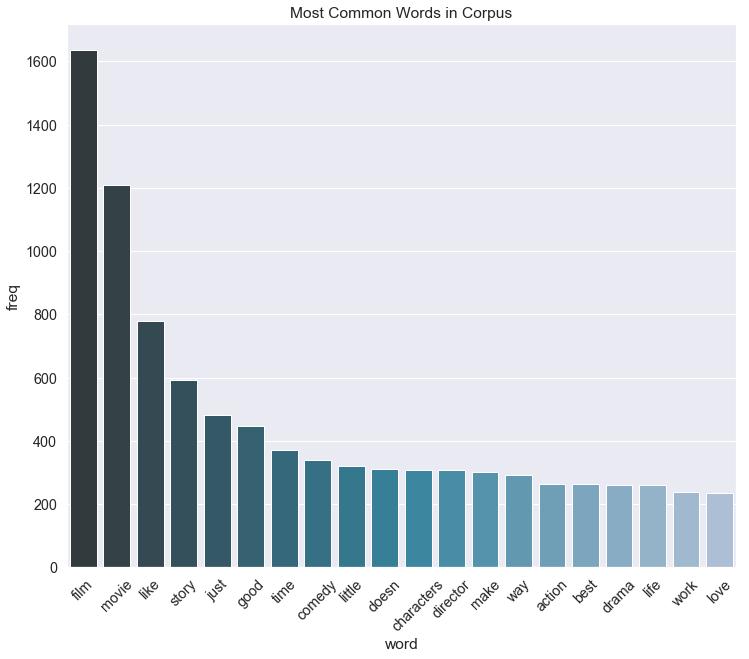

In [15]:
#cv = CountVectorizer()
#bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts.sum(axis=0)).ravel()))
word_counter = Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(20), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.title("Most Common Words in Corpus")
plt.savefig("images/most_common_words")
plt.show();

In [16]:
print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
y=df_quick["Freshness"].values
vectorized
nb_model.fit(X_train_counts, y)


Training a Naive Bayes model.


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
df_test = df[1000:2000]
X_test = df_test["Review"].values
X_test_counts = count_vect.transform(X_test)
y_test = df_test["Freshness"].values

In [18]:
nb_model.score(X_test_counts, y_test)

0.897

In [28]:
df_quick.values
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(docs_porter)

AttributeError: 'list' object has no attribute 'lower'